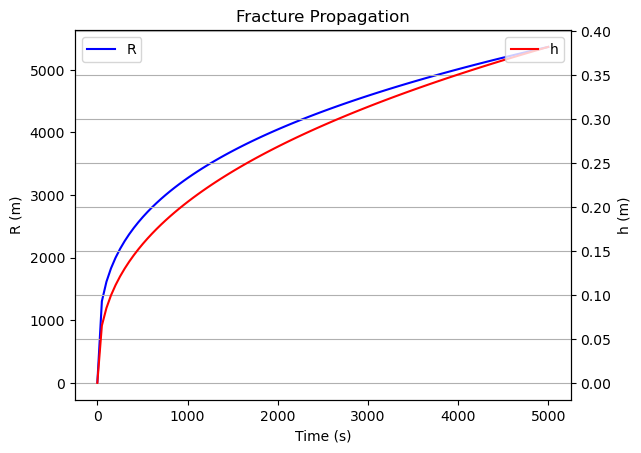

Central height: 0.38 m


In [26]:
import numpy as np
import matplotlib.pyplot as plt

pi = np.pi
alpha = 1/3 
nu = 0.33 
R = 5e3               # radius of the sphere (m)
E = 0.88e10           # Young's modulus (Pa)
H = 500
B = E*H**3/12/(1-nu**2)     # bending stiffness (Pa m^3)
Q = 2e3               # inflow rate (m^3/s)
mu = 1e-3             # viscosity (Pa s)
Kc = 1e8              # fracture toughness (Pa m^0.5)
V = 1e7               # volume of the material (m^3)
t0 = V/Q              # time (s)
pb = E*V/(4*alpha*(1-nu**2)*R**3)/1e6
p = Kc/R**0.5/1e6

h0 = 3*Q*t0/pi/R**2

kR = 1.21*(B*H*Q**3/mu)**(1/13)
kh = 0.66*(mu*Q**7/B/H)**(1/13)
t = np.linspace(0, t0, 100)

fig, ax1 = plt.subplots()
ax1.plot(t, kR*t**(4/13), color='b',label='R')
ax2 = ax1.twinx()
ax2.plot(t, h0*(t/t0)**(5/13), color='r',label='h')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('R (m)')
ax2.set_ylabel('h (m)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Fracture Propagation')   
plt.grid()
plt.show()
print(f"Central height: {h0:.2f} m")
# print(f"p = {p:.2f} MPa")
# print(f"pb = {pb:.2f} MPa")

In [27]:
1.15*13

14.95

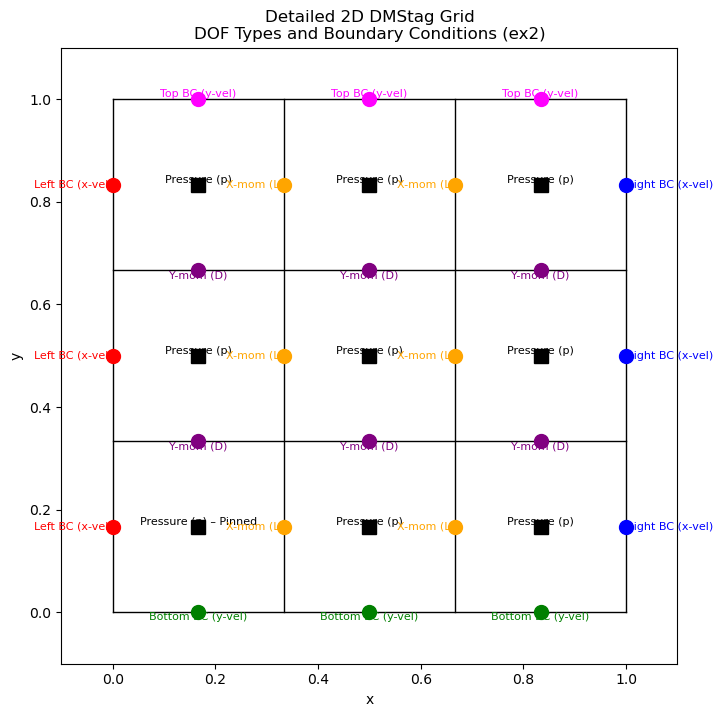

In [2]:
import matplotlib.pyplot as plt

# Grid parameters: a simple 3x3 grid over the unit square
nx, ny = 3, 3
width, height = 1.0, 1.0
dx, dy = width / nx, height / ny

fig, ax = plt.subplots(figsize=(8,8))

# Draw grid lines (cell boundaries)
for i in range(nx+1):
    ax.plot([i*dx, i*dx], [0, height], 'k-', lw=1)
for j in range(ny+1):
    ax.plot([0, width], [j*dy, j*dy], 'k-', lw=1)

# Loop over each cell to plot DOF markers and annotate
for i in range(nx):
    for j in range(ny):
        x0, y0 = i * dx, j * dy
        x1, y1 = (i+1) * dx, (j+1) * dy
        xc, yc = (x0+x1)/2, (y0+y1)/2
        
        # LEFT edge: x-velocity (Dirichlet if left boundary, else x-momentum eqn)
        if i == 0:
            left_label = "Left BC (x-vel)"
            left_color = "red"
        else:
            left_label = "X-mom (L)"
            left_color = "orange"
        ax.plot(x0, yc, marker="o", color=left_color, markersize=10)
        ax.text(x0, yc, left_label, color=left_color, fontsize=8,
                verticalalignment="center", horizontalalignment="right", rotation=0)
        
        # RIGHT edge: x-velocity Dirichlet if on right boundary
        if i == nx - 1:
            ax.plot(x1, yc, marker="o", color="blue", markersize=10)
            ax.text(x1, yc, "Right BC (x-vel)", color="blue", fontsize=8,
                    verticalalignment="center", horizontalalignment="left", rotation=0)
            
        # BOTTOM edge: y-velocity (Dirichlet if bottom boundary, else y-momentum eqn)
        if j == 0:
            bottom_label = "Bottom BC (y-vel)"
            bottom_color = "green"
        else:
            bottom_label = "Y-mom (D)"
            bottom_color = "purple"
        ax.plot((x0+x1)/2, y0, marker="o", color=bottom_color, markersize=10)
        ax.text((x0+x1)/2, y0, bottom_label, color=bottom_color, fontsize=8,
                verticalalignment="top", horizontalalignment="center", rotation=0)
        
        # TOP edge: y-velocity Dirichlet if on top boundary
        if j == ny - 1:
            ax.plot((x0+x1)/2, y1, marker="o", color="magenta", markersize=10)
            ax.text((x0+x1)/2, y1, "Top BC (y-vel)", color="magenta", fontsize=8,
                    verticalalignment="bottom", horizontalalignment="center", rotation=0)
                    
        # ELEMENT (cell center): pressure equation
        p_label = "Pressure (p)"
        # Assume pinPressure is used: pin the pressure at cell (0,0)
        if i == 0 and j == 0:
            p_label += " – Pinned"
        ax.plot(xc, yc, marker="s", color="black", markersize=10)
        ax.text(xc, yc, p_label, color="black", fontsize=8,
                verticalalignment="bottom", horizontalalignment="center", rotation=0)

# Set plot properties
ax.set_xlim(-0.1, width+0.1)
ax.set_ylim(-0.1, height+0.1)
ax.set_aspect("equal", adjustable="box")
ax.set_title("Detailed 2D DMStag Grid\nDOF Types and Boundary Conditions (ex2)")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()


In [ ]:
n2d_0m3s_kappa1e_10_mu1e0_hbreg0_spinup
n2d_0m3s_kappa1e_10_mu1e1_hbreg0_spinup
n2d_0m3s_kappa1e_10_mu1e1_hbreg1e_3_spinup
n2d_0m3s_kappa1e_10_mu1e1_hbreg2e_3_spinup
n2d_0m3s_kappa1e_10_mu1e1_hbreg3e_3_spinup
n2d_0m3s_kappa1e_10_mu1e1_hbreg4e_3_spinup
n2d_0m3s_kappa1e_10_mu1e1_hbreg5e_3_spinup
n2d_0m3s_kappa1e_10_mu1e3_hbreg0_spinup
n2d_100m3s_kappa1e_10_mu1e1_hbreg0_spinup
n2d_100m3s_kappa1e_10_mu1e2_hbreg0_spinup
n2d_100m3s_kappa1e_10_mu1e3_hbreg0_spinup
n2d_100m3s_kappa1e_8_mu1e3_hbreg0_spinup
n2d_100m3s_kappa1e_9_mu1e2_hbreg0_spinup
n2d_10m3s_kappa1e_10_mu1e1_hbreg0_spinup
n2d_10m3s_kappa1e_10_mu1e2_hbreg0_spinup
n2d_10m3s_kappa1e_10_mu1e3_hbreg0_spinup
n2d_10m3s_kappa1e_8_mu1e3_hbreg0_spinup
n2d_10m3s_kappa1e_9_mu1e2_hbreg0_spinup